# Exam 1 (100 pts total)

files needed = (`2021-02.csv`, `invest.csv`, `phil.xls`, `exam1_f21_q5.png`, `exam1_f21_q1.png`), which can be found in `exam1_data_prac.zip`

You have 75 minutes to complete this exam.

Answer all the questions below in this notebook. You should insert as many cells into the notebook as you need. When you are finished, upload your finished notebook to Canvas. 

* You may use your notes and the Internet, but you cannot work with others.  
* Import any packages you need to complete this exam.
* Do not modify the data files directly. All data manipulation should happen in your code.

Remember, jupyter notebooks and python have lots of built in help facilities. 

## Question 0 (5 pts): Collison, Jack
 
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

## Question 1 (10 pts): Visualization


The figure below is a plot of the consumer price index (CPI), which is the average price in the US at each point in time.  It uses the default figure setting from the FRED database.

The *inflation rate* is the growth rate of the CPI. 

Insert a markdown cell below, and answer the following questions. 

1. I want to include this figure in a research paper that will be printed out in black and white and distributed. How would you change this figure? 

2. I want the message to be "the inflation rate in 2021 is high compared to its values since 2000." How would you change this figure?

![alt](exam1_data_prac/exam1_f21_q1.png)

1. I would absolutely delete the color in the background. It is going to look dark when printed in black and white. I would probably delete the gridlines, but it would be okay if you kept them. I would also remove the FRED logo and the text at the bottom of the figure. I would put the source of the data in the notes that accompany the figure. I would experiment with the recession bars to see if they interfere with the black-and-white plot. \[You do not need to list all of these things. The colored background is probably the most egregious.\] 

2. The most important change is to report the data in growth rates (the inflation rate) rather than the levels. Otherwise, the reader has to guess at the slopes of the line to determine the inflation rates. I would also change the sample to only include 2000-2021 to make it easier to focus on the period of interest. I might also add a horizontal line at the 2021 value to make it very easy to compare the 2021 value to the past values. \[Not mentioning changing the figure to the inflation rate was the most common source of points off here.\] 

## Question 2 (20 pts): Functions and flow control

Write a function that takes two argumens: a list of weights ($\omega$) and a list of values ($x$). There are $N$ values and weights. The function should return the weighted average of the values. 

$$
\text{weighted average} = \sum_{i=0}^N(\omega_i x_i)
$$

which is the same as 

$$
\text{weighted average} = \omega_0 * x_0 + \omega_1 * x_1 + \cdots + \omega_{N-1} * x_{N-1}
$$



Use your function to compute the weighted average of the list `values` using the weights `weights`. Print out the weighted average as 

"The weighted average is ??.??." Replace the ??.?? with the weighted average. 

```python
weights = [0.1, 0.2, 0.05, 0.1, 0.15, 0.35, 0.03, 0.02]
values = [25, 75, 33, 26, 87, 64, 21, 55]
```

In [5]:
def wtavg(wts, vals):
    temp = 0
    for w, v in zip(wts, vals):
        temp = temp + w*v
    
    return temp        

In [6]:
weights = [0.1, 0.2, 0.05, 0.1, 0.15, 0.35, 0.03, 0.02]
values = [25, 75, 33, 26, 87, 64, 21, 55]

print('The weighted average is {0:5.2f}.'.format(wtavg(weights, values)))

The weighted average is 58.93.



## Question 3 (20 pts): Selecting data from a DataFrame 

Load the file '2021-02.csv'. It contains US imports by 10-digit harmonized system code, by country, for February 2021. 

An observation (row of the data) is the imports of a good from a country in Feburary 2021.

The variables of interest: 

* `I_COMMODITY` = The code that identifies the type of good. Example:  6505002590 is the code for "knitted hats."
* `CTY_CODE` = The code that identifies the exporting country. Example: 2010 is the code for "Mexico."
* `GEN_VAL_MO` = The value of imports of the good from the 


Use python and pandas to answer the following questions.


In [9]:
import pandas as pd
imports = pd.read_csv('2021-02.csv')
imports.sample(5)

,GEN_VAL_MO,CC_MO,AIR_VAL_MO,VES_VAL_MO,COMM_LVL,I_COMMODITY,VES_WGT_MO,GEN_QY1_MO,GEN_QY2_MO,AIR_WGT_MO,time,CTY_CODE
134020,13375,24,13375,0,HS10,6402993145,0,1560,0,557,2021-02,5530
157612,84593,19,5335,79258,HS10,8483308020,24303,24230,0,5,2021-02,5800
125914,5594,1,0,5594,HS10,7326908688,20,20,0,0,2021-02,5460
171163,12500,2,0,0,HS10,9010505000,0,57,0,0,2021-02,5880
176508,9810,2,9810,0,HS10,8211945000,0,187,0,106,2021-02,6021


1. How many countries have positive `GEN_VAL_MO` for `I_COMMODITY` 6505002590? Print the answer as 

"There are ?? countries with positive exports of 6505002590." Replace ?? with your answer.

In [13]:
num_cty = imports[(imports['I_COMMODITY'] == 6505002590) & (imports['GEN_VAL_MO'] > 0)].shape[0]

num_cty
#print("There are {} countries with positive exports of 6505002590.".format(num_cty)) 

38

2.  For this question
    1. Compute the total value of imports of commodity 6505002590. 
    2. Compute the total value of imports of commodity 6505002590 that are from country 2010. 
    3. Report your answer as the share of total imports of commodity 6505002590 **that come from Mexico.** 

"The share of imports of commodity 6505002590 from Mexico is ?.?? percent."  

Replace the ?.?? with your answer. 

In [18]:
im_tot = imports[imports['I_COMMODITY'] == 6505002590]['GEN_VAL_MO'].sum()
print(im_tot)
im_mex = imports[(imports['I_COMMODITY'] == 6505002590) & (imports['CTY_CODE'] == 2010)]['GEN_VAL_MO'].sum()
print(im_mex)
print("The share of imports of commodity 6505002590 from Mexico is {0:.2f} percent.".format(im_mex / im_tot*100))

6768295
208029
The share of imports of commodity 6505002590 from Mexico is 3.07 percent.


3. Create a new DataFrame that contains only the columns `CTY_CODE`, `I_COMMODITY`, `VES_VAL_MO`, and `AIR_VAL_MO`. Drop all rows from this new DataFrame that do not have strictly positive values for **both** `VES_VAL_MO` and `AIR_VAL_MO`.

Report the number of rows and columns in your new DataFrame as 

"There are ????? rows and ? columns in the new DataFrame." 

Replace ? with the number of rows and ????? with the number of columns.

In [19]:
imports_new = imports[(imports['VES_VAL_MO'] > 0) & (imports['AIR_VAL_MO'] > 0)][['CTY_CODE', 'I_COMMODITY', 'VES_VAL_MO', 'AIR_VAL_MO']]
print("There are {0} rows and {1} columns in the new DataFrame.".format(imports_new.shape[0], imports_new.shape[1]))

There are 36269 rows and 4 columns in the new DataFrame.


## Question 4 (15 pts): Loading messy data

The file 'invest.csv' contains quarterly U.S. private nonresidentrial fixed investment (PNFI). 

1. Print out 3 random rows from your DataFrame.

In [23]:
inv = pd.read_csv('invest.csv', header=11, thousands=',')
print(inv.dtypes)
inv.sample(3)

observation_date     object
PNFI                float64
dtype: object


,observation_date,PNFI
223,2002-10-01,1.331215e+12
290,2019-07-01,2.969292e+12
159,1986-10-01,6.105530e+11


2. Print out: "Average investment is is ???,???,???,???." 

   Replace the ???,???,???,??? with the average PNFI. Note the commas separating the thousands and no digits to the right of the decimal point.

In [24]:
print("Average investment is {:,.0f}.".format(inv['PNFI'].mean() ))

Average investment is 843,439,285,235.


## Question 5 (30 pts): Plotting

### 3/8/2022: Looks like I had a typo when I created the original figure to replicate. The position associated with 2021-04-01 data point was incorrect.  The correct version is below. 

The file 'phil.xls' contains the US unemployment rate and inflation rate. Use these data to recreate the figure below.  Some details:
 
* The title font size is 20
* The y-axis and y-axis label font size is 16
* Adjust the size of the data markers (the stars) so that they are larger than the default. Do not make them so large that they are hard to read, though.
* The x-axis min and max are (2, 15)

![alt](exam1_data_prac/exam1_f21_q5.png)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
phil = pd.read_excel('phil.xls')
phil.head(2)

,observation_date,unemp,infl
0,2006-01-01,4.7,4.2
1,2006-02-01,4.8,4.2


In [26]:
phil[phil['observation_date'].isin(['2021-04-01', '2021-09-01'])]

,observation_date,unemp,infl
183,2021-04-01,6.1,7.864
188,2021-09-01,4.8,10.862


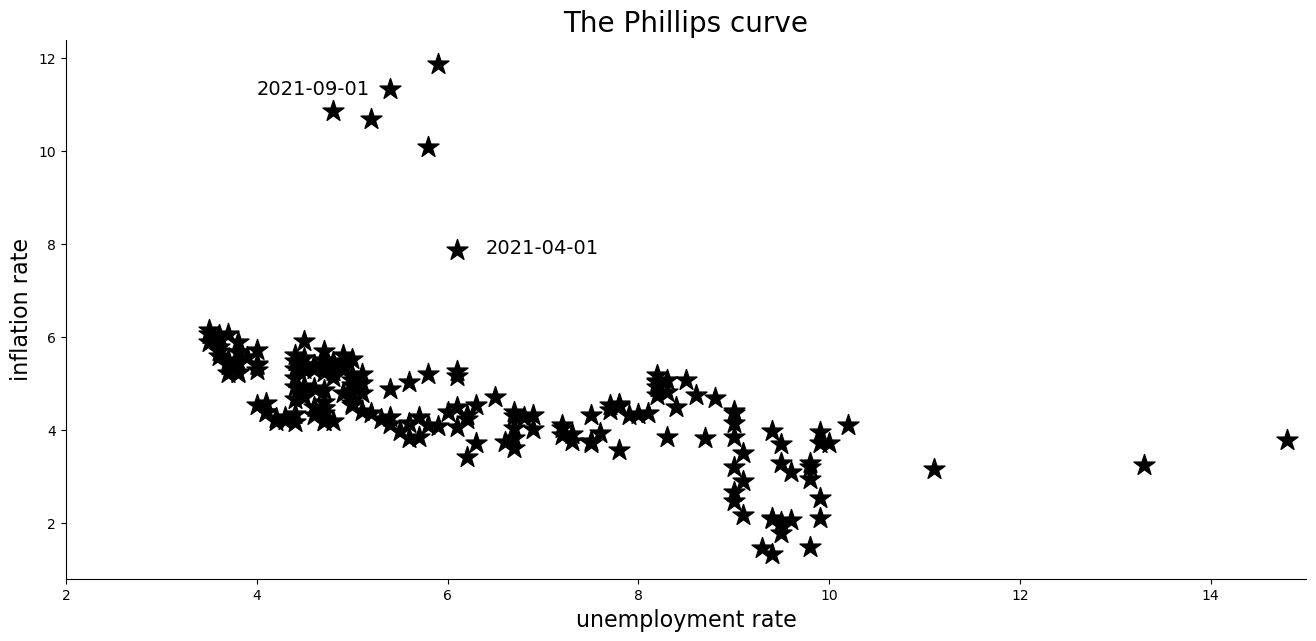

In [27]:
fig, ax = plt.subplots(figsize=(16,7))

#ax.plot(phil['unemp'], phil['infl'], color='black', marker='*', markersize=15, ls='')
ax.scatter(phil['unemp'], phil['infl'], color='black', marker='*', s=250)

ax.set_xlabel('unemployment rate', fontsize=16)
ax.set_ylabel('inflation rate', fontsize=16)
ax.set_title('The Phillips curve', fontsize=20)

ax.set_xlim(2, 15)

ax.text(4.0, 11.2, '2021-09-01', fontsize=14)
ax.text(6.4, 7.8, '2021-04-01', fontsize=14)

sns.despine()
plt.savefig('exam1_f21_q5.png')
plt.show()

### You are finished!
Upload your completed notebook to Canvas.